In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast



In [3]:
df = pd.read_csv('./movies_metadata.csv')
df.head()

<ipython-input-3-24f484ac670d>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:
# df['genres']의 dictionary를 list로 변환

df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df['genres']

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genres, Length: 45466, dtype: object

In [12]:
vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
vote_averages_mean = vote_averages.mean()
vote_averages_mean

5.244896612406511

In [22]:
# 총 45460개의 영화 중 상위 5%는 2273번째
vote_counts.sort_values(ascending=False)[2273:2274]

11561    434
Name: vote_count, dtype: int64

In [25]:
vote_counts_95 = vote_counts.quantile(0.95)
vote_counts_95

434.0

In [26]:
# 출시 연도만 
# errors='coerce'는 유효하지 않은 값을 NaT으로 대체한다.
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
df['year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45461     NaT
45462    2011
45463    2003
45464    1917
45465    2017
Name: year, Length: 45466, dtype: object

In [27]:
# 평가수 상위 5%인 데이터 
qualified = df[(df['vote_count'] >= vote_counts_95) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified.head()

,title,year,vote_count,vote_average,popularity,genres
0,Toy Story,1995,5415.0,7.7,21.946943,"[Animation, Comedy, Family]"
1,Jumanji,1995,2413.0,6.9,17.015539,"[Adventure, Fantasy, Family]"
5,Heat,1995,1886.0,7.7,17.924927,"[Action, Crime, Drama, Thriller]"
9,GoldenEye,1995,1194.0,6.6,14.686036,"[Adventure, Action, Thriller]"
15,Casino,1995,1343.0,7.8,10.137389,"[Drama, Crime]"


In [29]:
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.head()

,title,year,vote_count,vote_average,popularity,genres,vote_counts
0,Toy Story,1995,5415,7,21.946943,"[Animation, Comedy, Family]",5415
1,Jumanji,1995,2413,6,17.015539,"[Adventure, Fantasy, Family]",2413
5,Heat,1995,1886,7,17.924927,"[Action, Crime, Drama, Thriller]",1886
9,GoldenEye,1995,1194,6,14.686036,"[Adventure, Action, Thriller]",1194
15,Casino,1995,1343,7,10.137389,"[Drama, Crime]",1343


In [30]:
# 가중치
def weighted_rating(x, vote_averages_mean=vote_averages_mean, vote_counts_95=vote_counts_95):
    v = x['vote_count']
    R = x['vote_average']

    return (v/(v+vote_counts_95)*R) + (vote_counts_95/(vote_counts_95+v)*vote_averages_mean)



In [32]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)
qualified['wr']

0        6.869770
1        5.884891
5        6.671675
9        5.798701
15       6.571348
           ...   
44624    6.261904
44632    5.722745
44678    6.757878
44842    5.825125
45014    5.094728
Name: wr, Length: 2274, dtype: float64

In [33]:
qualified

,title,year,vote_count,vote_average,popularity,genres,vote_counts,wr
0,Toy Story,1995,5415,7,21.946943,"[Animation, Comedy, Family]",5415,6.869770
1,Jumanji,1995,2413,6,17.015539,"[Adventure, Fantasy, Family]",2413,5.884891
5,Heat,1995,1886,7,17.924927,"[Action, Crime, Drama, Thriller]",1886,6.671675
9,GoldenEye,1995,1194,6,14.686036,"[Adventure, Action, Thriller]",1194,5.798701
15,Casino,1995,1343,7,10.137389,"[Drama, Crime]",1343,6.571348
...,...,...,...,...,...,...,...,...
44624,What Happened to Monday,2017,598,7,60.581223,"[Science Fiction, Thriller]",598,6.261904
44632,Atomic Blonde,2017,748,6,14.455104,"[Action, Thriller]",748,5.722745
44678,Dunkirk,2017,2712,7,30.938854,"[Action, Drama, History, Thriller, War]",2712,6.757878
44842,Transformers: The Last Knight,2017,1440,6,39.186819,"[Action, Science Fiction, Thriller, Adventure]",1440,5.825125


In [34]:
# weighted rating 상위 250개
qualified = qualified.sort_values('wr', ascending=False).head(250)
qualified

,title,year,vote_count,vote_average,popularity,genres,vote_counts,wr
15480,Inception,2010,14075,8,29.108149,"[Action, Thriller, Science Fiction, Mystery, A...",14075,7.917588
12481,The Dark Knight,2008,12269,8,123.167259,"[Drama, Action, Crime, Thriller]",12269,7.905871
22879,Interstellar,2014,11187,8,32.213481,"[Adventure, Drama, Science Fiction]",11187,7.897107
2843,Fight Club,1999,9678,8,63.869599,[Drama],9678,7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,"[Adventure, Fantasy, Action]",8892,7.871787
...,...,...,...,...,...,...,...,...
2006,Indiana Jones and the Temple of Doom,1984,2841,7,15.802306,"[Adventure, Action]",2841,6.767415
16129,The King's Speech,2010,2817,7,11.260387,"[Drama, History]",2817,6.765698
895,Sunset Boulevard,1950,533,8,11.709777,[Drama],533,6.763480
9888,Sin City,2005,2755,7,15.010525,"[Action, Thriller, Crime]",2755,6.761143


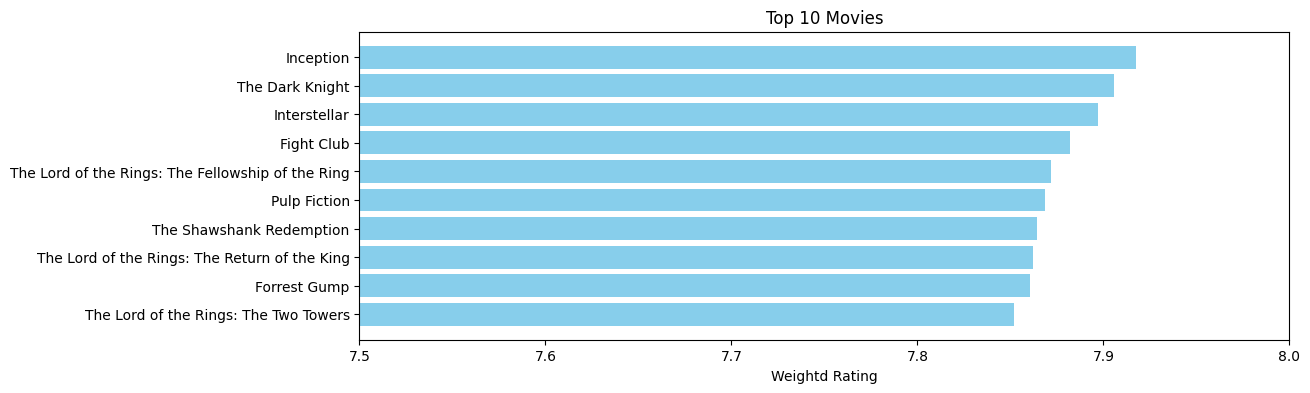

In [38]:
# 시각화

plt.figure(figsize=(12, 4))
plt.barh(qualified['title'].head(10), qualified['wr'].head(10), align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlim(7.5, 8)
plt.xlabel('Weightd Rating')
plt.title('Top 10 Movies')

plt.show()